# Load incidence data (monthly, yearly)

loading packages, loading data, data visualization

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from darts.utils import statistics
from darts.timeseries import TimeSeries
from darts.models import FFT
import warnings
warnings.filterwarnings("ignore")
df_year = pd.read_csv(r'.\DataSource\incidence_year.csv',parse_dates=True)#,parse_dates=True)
df_month = pd.read_csv(r'.\DataSource\incidence_month.csv', parse_dates=True)
df_month["total_cases"] = df_month.sum(axis=1)
print("Age groups:", df_month.columns)
print("Time span: months after 2011")
from darts.timeseries import TimeSeries
timeseries = TimeSeries.from_dataframe(df_month)

Age groups: Index(['0_4', '5_9', '10_14', '15_19', '20_49', '50_64', '65+', 'total_cases'], 
dtype='object')

Time span: months after 2011

# Check the seasonal pattern

Check whether the time seris has seasonal pattern and see what the single season is.

## Method one: inferred from the Auto-correlation Function (ACF) 

In [29]:
for agegroup in df_month.columns:
    boolvalue, season = statistics.check_seasonality(timeseries[agegroup])
    print(agegroup,"seasonal or not:", boolvalue, "season:", season)

0_4 seasonal or not: True season: 7

5_9 seasonal or not: True season: 4

10_14 seasonal or not: False season: 0

15_19 seasonal or not: True season: 22

20_49 seasonal or not: False season: 0

50_64 seasonal or not: True season: 10

65+ seasonal or not: True season: 11

total_cases seasonal or not: False season: 0

## Method two: fast Fourier transform

<Figure size 432x432 with 1 Axes>

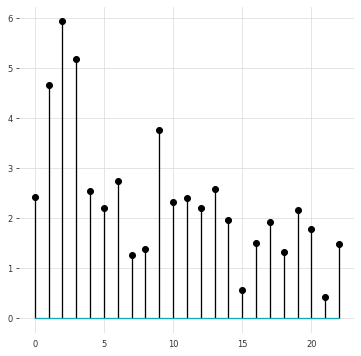

<Figure size 432x432 with 1 Axes>

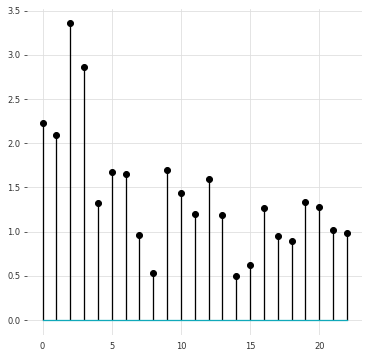

<Figure size 432x432 with 1 Axes>

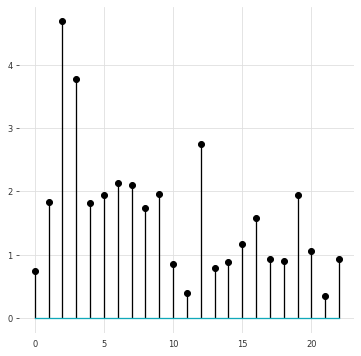

<Figure size 432x432 with 1 Axes>

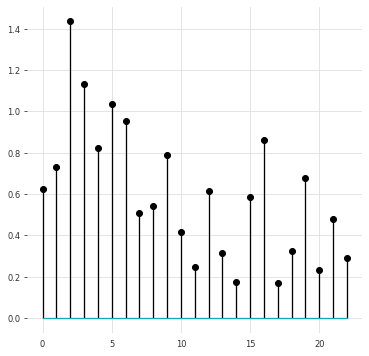

<Figure size 432x432 with 1 Axes>

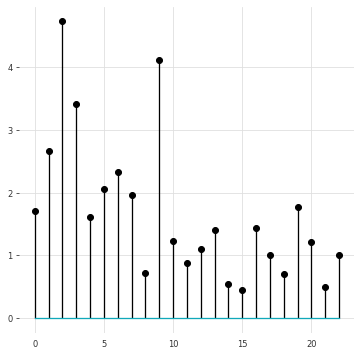

<Figure size 432x432 with 1 Axes>

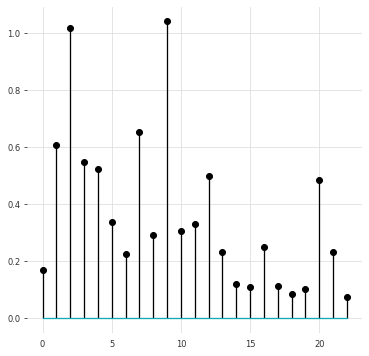

<Figure size 432x432 with 1 Axes>

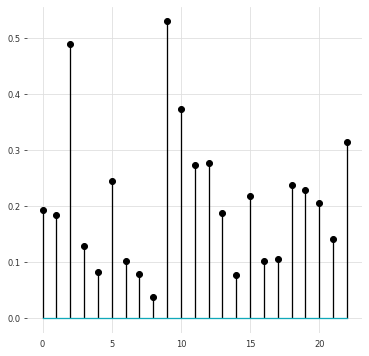

<Figure size 432x432 with 1 Axes>

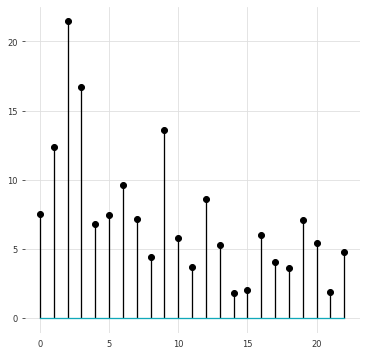

In [57]:
# Perform Fourier transform using scipy
import numpy as np
from scipy import fftpack
for agegroup in df_month.columns:
    case_fft = fftpack.fft(df_month[agegroup].values)
    # Plot data
    n = len(df_month[agegroup].values)
    y_m = 2 / n * abs(case_fft[1:24])
    plt.figure(figsize=(6, 6))
    plt.stem(y_m)  # plot freq domain


In [37]:
model = FFT(nr_freqs_to_keep=20)
A = model.fit(timeseries["0_4"])
print(A)

FFT(nr_freqs_to_keep=20, trend=None)

In [32]:
model = FFT(nr_freqs_to_keep=20)
for agegroup in df_month.columns:
    model.fit(timeseries[agegroup])

In [11]:
#result_mul = seasonal_decompose(df_month['0_4']+1,period=12,model='multiplicative')
                                #model='multiplicative',
                                #extrapolate_trend='freq')
#deseason = df_month['0_4'] - result_mul.seasonal
#plt.figure(figsize=(15, 6))
#plt.plot(deseason)
#plt.title('Deseasoning using seasonal_decompose', fontsize=16)
#plt.xlabel('month')
#plt.ylabel('incidence')
#plt.show()

<Figure size 432x288 with 4 Axes>

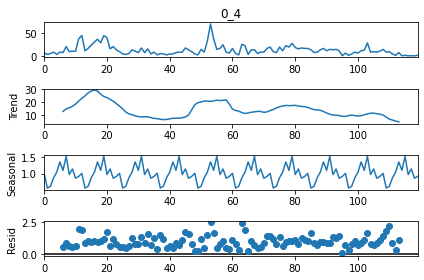

<Figure size 432x288 with 4 Axes>

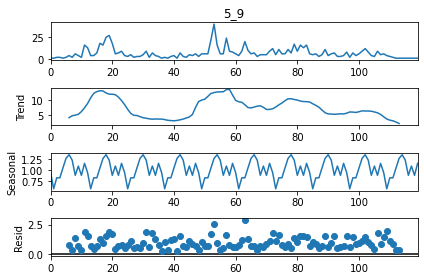

<Figure size 432x288 with 4 Axes>

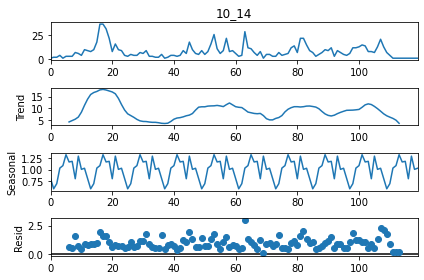

<Figure size 432x288 with 4 Axes>

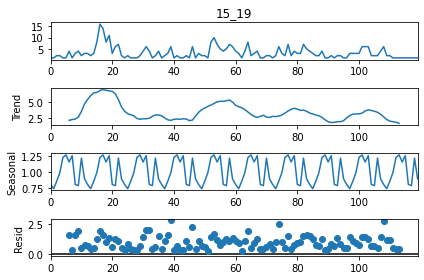

<Figure size 432x288 with 4 Axes>

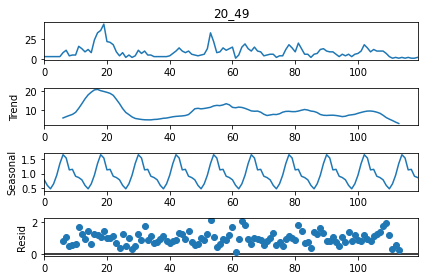

<Figure size 432x288 with 4 Axes>

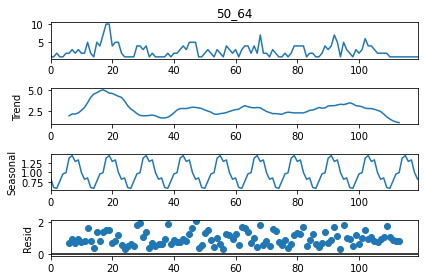

<Figure size 432x288 with 4 Axes>

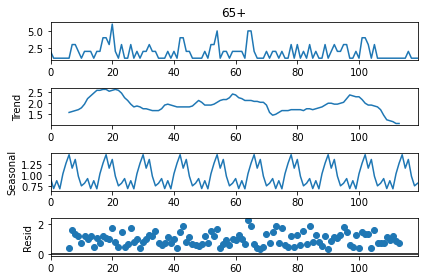

<Figure size 432x288 with 4 Axes>

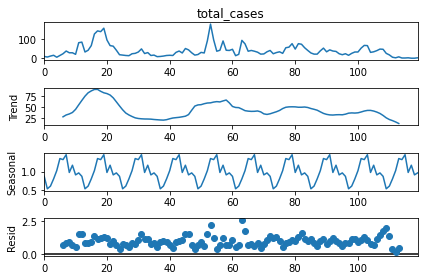

In [14]:

#grid1 = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)
#plt.figure(figsize=(15, 10))

for agegroup in df_month.columns:
    result_mul = seasonal_decompose(df_month[agegroup]+1,period=12,model='multiplicative')
    #plt.figure(figsize=(15, 6))
    result_mul.plot()   

<Figure size 432x288 with 4 Axes>

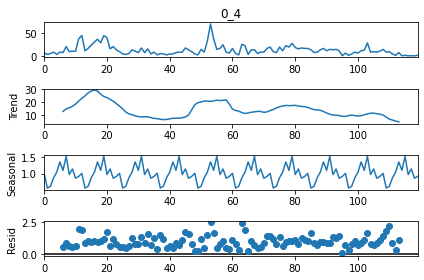

In [4]:
fig = result_mul.plot()

# Pre-Prediction by time series method

## N-BEATS method
N-BEATS is a state-of-the-art model that shows the potential of pure deep learning architectures in the context of the time-series forecasting. It outperforms well-established statistical approaches on the M3, and M4 competitions. For more details on the model, see: https://arxiv.org/pdf/1905.10437.pdf.

2022-07-21 09:52:36 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:52:36 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-21 09:52:36 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:52:36 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:52:36 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:52:36 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:52:36 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
----

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:52:55 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:52:55 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:52:55 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:52:55 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:52:55 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:52:55 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:53:15 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:53:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:53:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:53:15 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:53:15 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:53:15 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:53:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:53:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:53:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:53:34 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:53:34 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:53:34 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:53:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:53:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:53:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:53:53 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:53:53 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:53:53 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:54:12 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:54:12 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:54:12 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:54:12 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:54:12 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:54:12 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:54:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:54:32 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:54:32 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:54:32 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:54:32 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:54:32 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 09:54:51 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 09:54:51 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 09:54:51 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 09:54:51 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 09:54:51 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 09:54:51 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

<Figure size 1080x432 with 1 Axes>

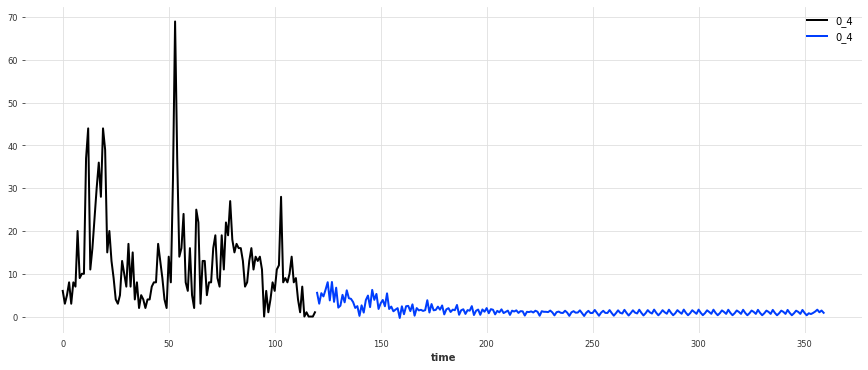

<Figure size 1080x432 with 1 Axes>

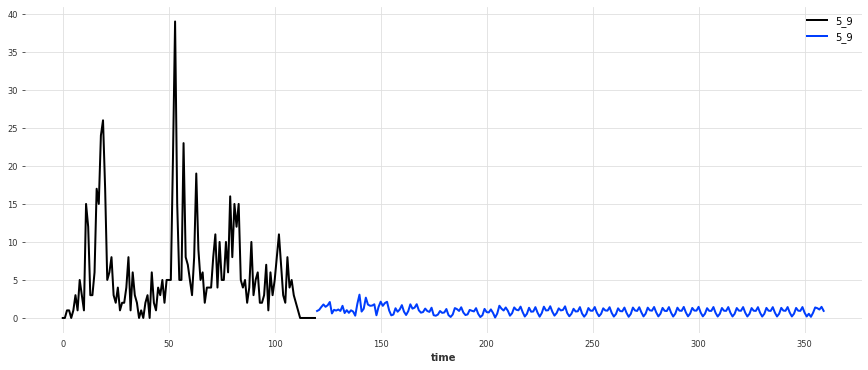

<Figure size 1080x432 with 1 Axes>

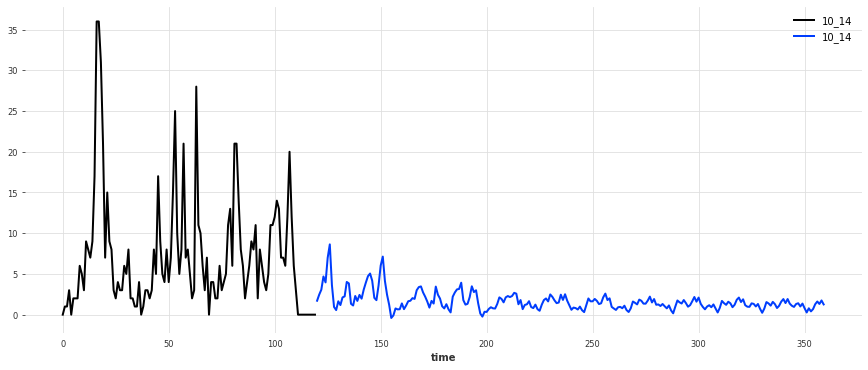

<Figure size 1080x432 with 1 Axes>

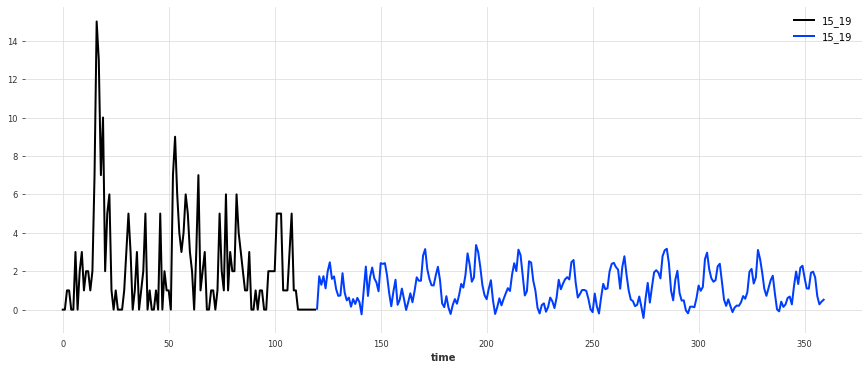

<Figure size 1080x432 with 1 Axes>

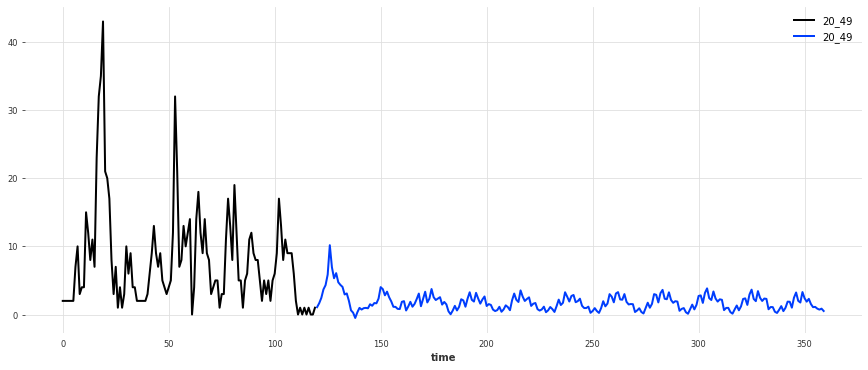

<Figure size 1080x432 with 1 Axes>

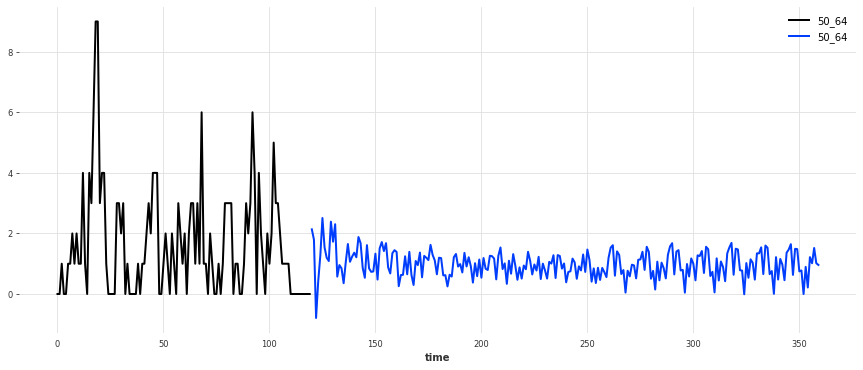

<Figure size 1080x432 with 1 Axes>

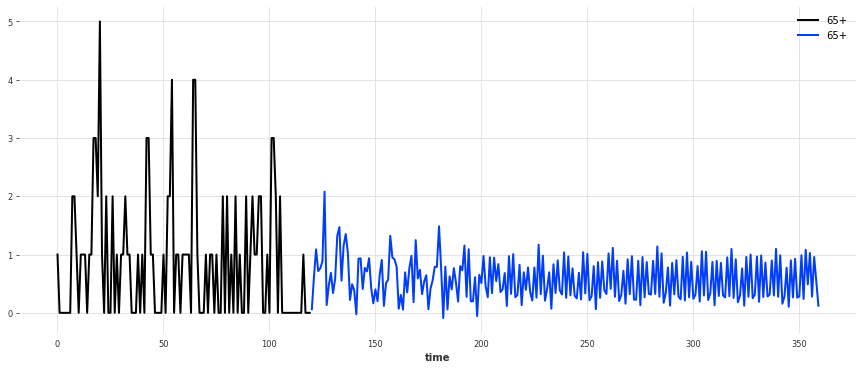

<Figure size 1080x432 with 1 Axes>

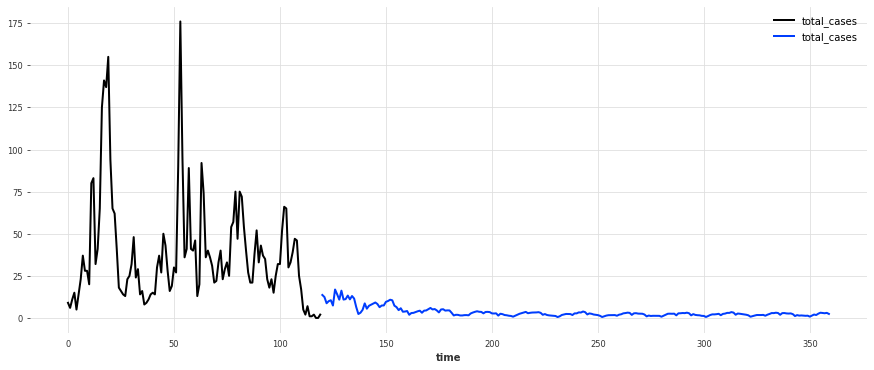

In [43]:
from darts.models import NBEATSModel
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)
for agegroup in df_month.columns:
    result_mul = model_nbeats.fit(timeseries[agegroup])
    plt.figure(figsize=(15, 6))
    timeseries[agegroup].plot()
    prediction = model_nbeats.predict(240)
    prediction.plot()


## Deep Autoregressive method

2022-07-21 10:04:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:04:46 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-21 10:04:46 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:04:46 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:04:46 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:04:46 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:04:46 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.8 K 
4 | 

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:04:52 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:04:52 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:04:52 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:04:52 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:04:52 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:04:52 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:04:58 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:04:58 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:04:58 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:04:58 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:04:58 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:04:58 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:05:04 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:05:04 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:05:04 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:05:04 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:05:04 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:05:04 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:05:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:05:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:05:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:05:10 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:05:10 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:05:10 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:05:16 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:05:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:05:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:05:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:05:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:05:16 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:05:22 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:05:22 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:05:22 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:05:22 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:05:22 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:05:22 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

2022-07-21 10:05:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 70 samples.
2022-07-21 10:05:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:05:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:05:28 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:05:28 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:05:28 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = RNNModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional ep

Training: 0it [00:00, ?it/s]

Predicting: 5it [00:00, ?it/s]

<Figure size 1080x432 with 1 Axes>

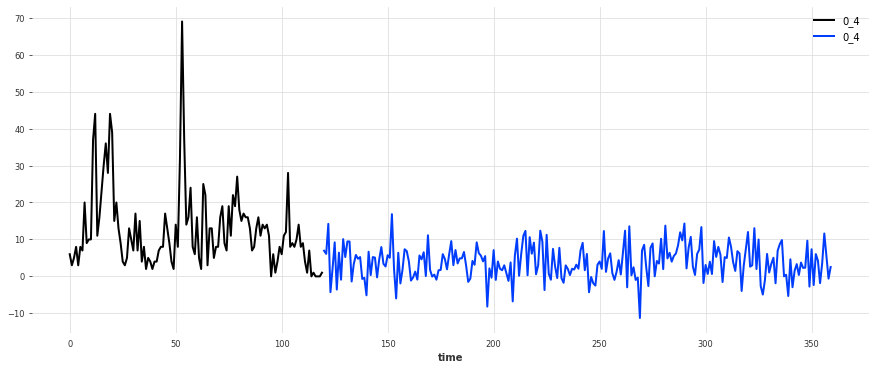

<Figure size 1080x432 with 1 Axes>

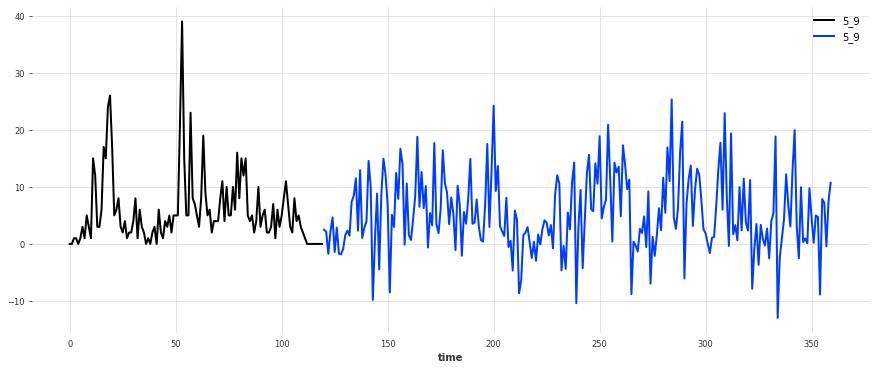

<Figure size 1080x432 with 1 Axes>

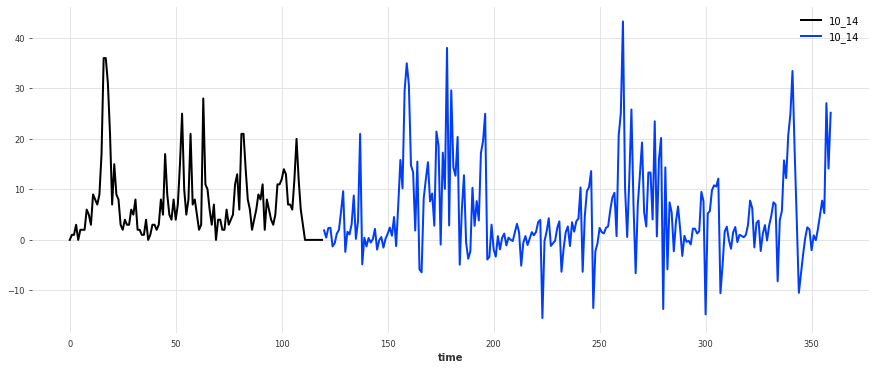

<Figure size 1080x432 with 1 Axes>

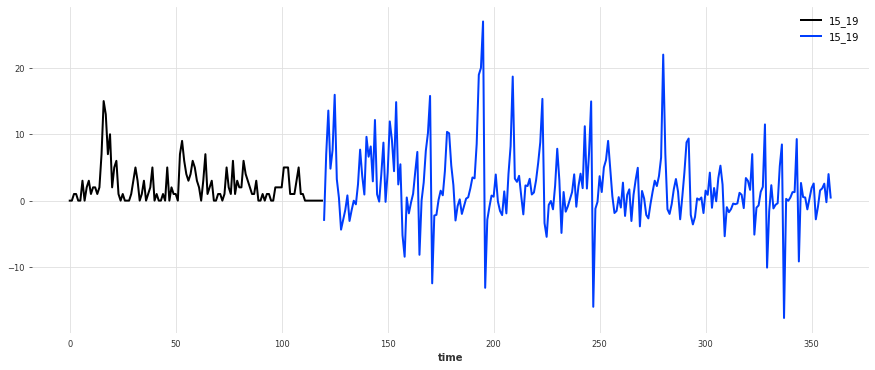

<Figure size 1080x432 with 1 Axes>

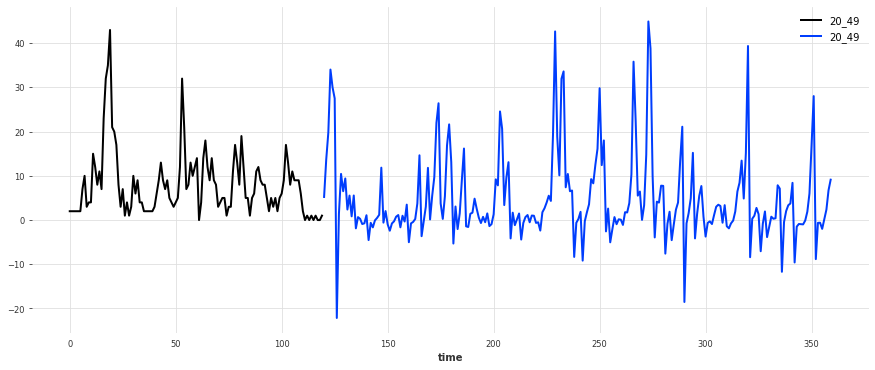

<Figure size 1080x432 with 1 Axes>

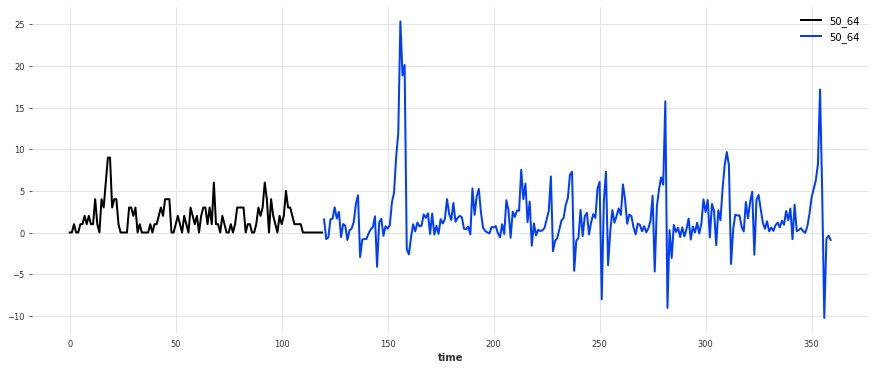

<Figure size 1080x432 with 1 Axes>

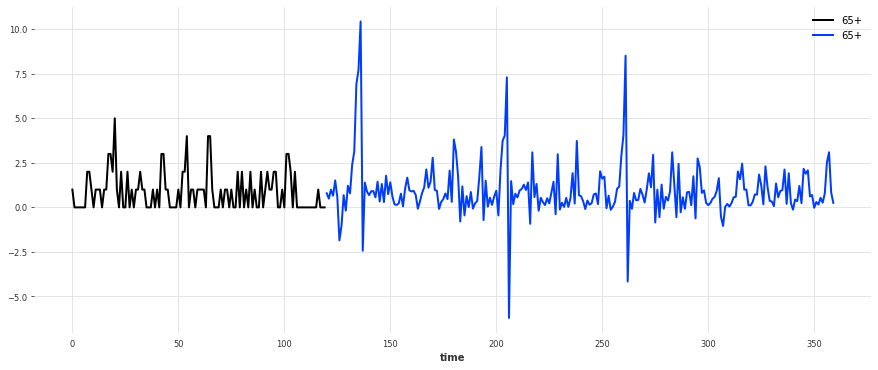

<Figure size 1080x432 with 1 Axes>

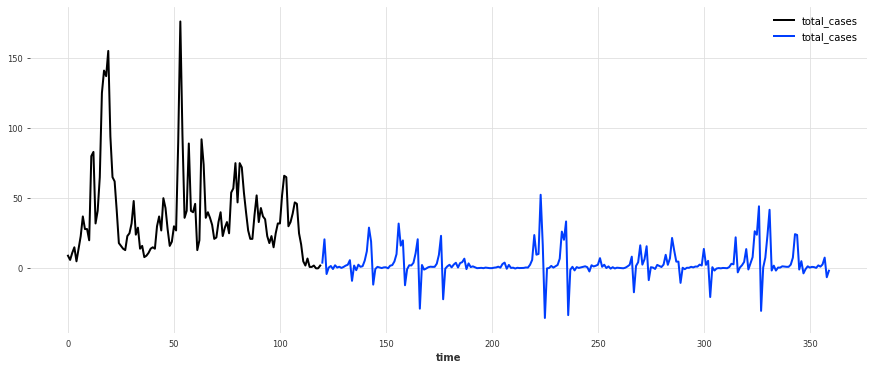

In [45]:
from darts.models import RNNModel
from darts.utils.likelihood_models import GaussianLikelihood
my_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=50,
    optimizer_kwargs={"lr": 1e-3},
    random_state=0,
    training_length=50,
    input_chunk_length=20,
    likelihood=GaussianLikelihood(),
)

for agegroup in df_month.columns:
    result_mul = my_model.fit(timeseries[agegroup])
    plt.figure(figsize=(15, 6))
    timeseries[agegroup].plot()
    prediction = my_model.predict(240)
    prediction.plot()

## NHiTSModel

N-HiTS is similar to N-BEATS (implemented in NBEATSModel), but attempts to provide better performance at lower computational cost by introducing multi-rate sampling of the inputs and mulit-scale interpolation of the outputs. [N-HiTS: Neural Hierarchical Interpolation for Time Series Forecasting](https://arxiv.org/abs/2201.12886)

2022-07-21 10:14:03 darts.models.forecasting.nhits INFO: (N-HiTS): Using automatic kernel pooling size: ((15,), (11,), (8,), (6,), (4,), (3,), (2,), (1,), (1,), (1,)).
2022-07-21 10:14:03 darts.models.forecasting.nhits INFO: (N-HiTS):  Using automatic downsampling coefficients: ((3,), (2,), (2,), (2,), (1,), (1,), (1,), (1,), (1,), (1,)).
2022-07-21 10:14:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:03 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-21 10:14:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:14:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:13 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:13 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:13 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:13 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:14:13 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:14:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:23 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:23 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:14:23 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:14:33 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:33 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:33 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:33 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:33 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:14:33 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:14:43 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:14:43 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:14:52 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:14:52 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:14:52 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:14:52 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:14:52 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:14:52 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:15:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:15:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:15:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:15:01 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:15:01 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:15:01 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-07-21 10:15:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 84 samples.
2022-07-21 10:15:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-21 10:15:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-21 10:15:11 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-21 10:15:11 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-21 10:15:11 darts.models.forecasting.torch_forecasting_model WARNING: Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NHiTSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional 

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

<Figure size 1080x432 with 1 Axes>

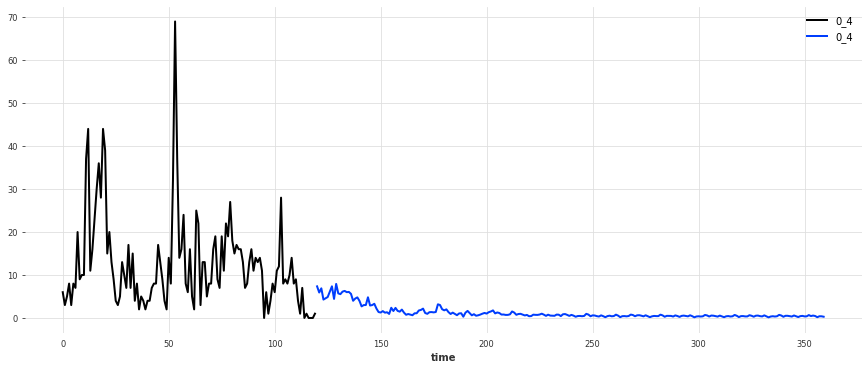

<Figure size 1080x432 with 1 Axes>

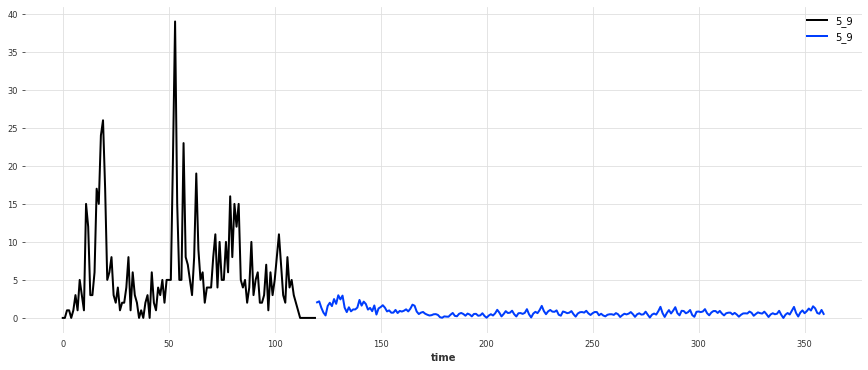

<Figure size 1080x432 with 1 Axes>

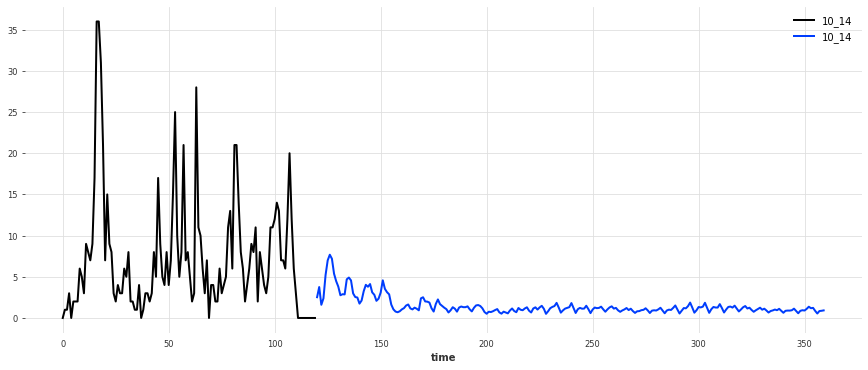

<Figure size 1080x432 with 1 Axes>

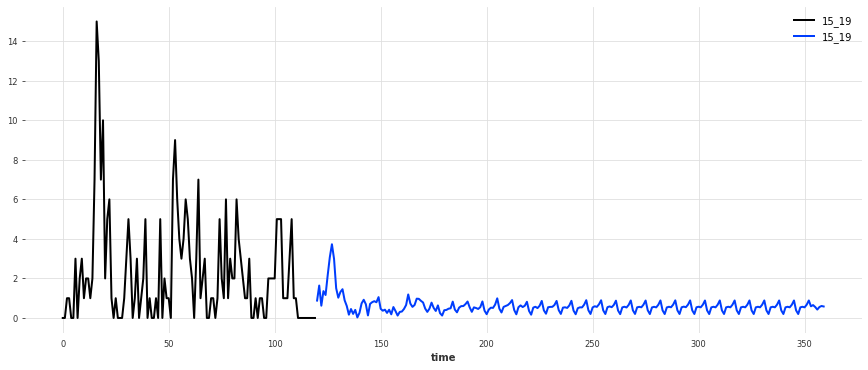

<Figure size 1080x432 with 1 Axes>

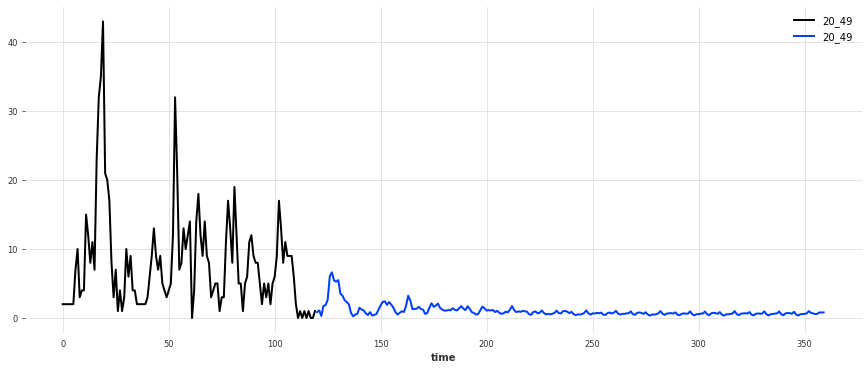

<Figure size 1080x432 with 1 Axes>

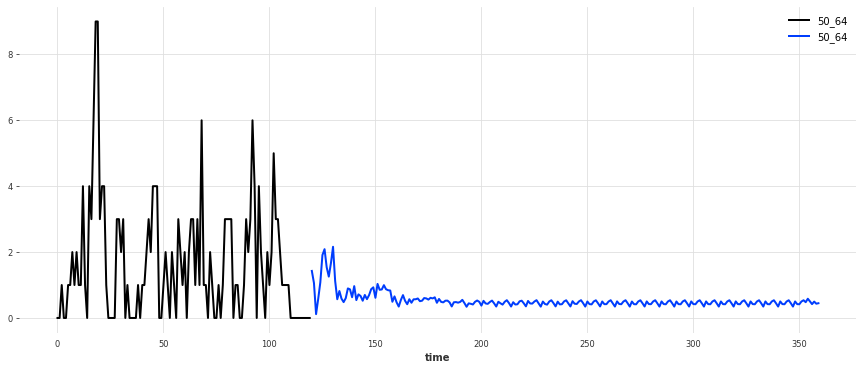

<Figure size 1080x432 with 1 Axes>

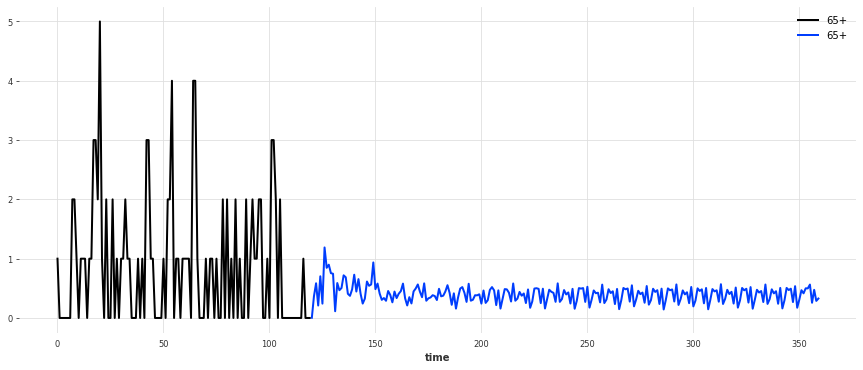

<Figure size 1080x432 with 1 Axes>

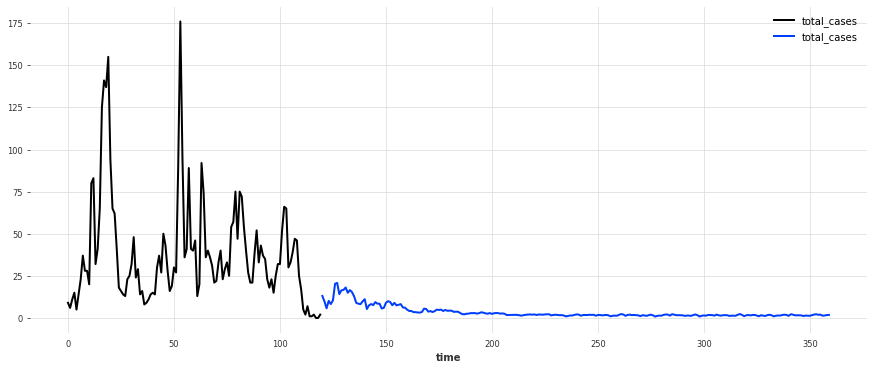

In [50]:
from darts.models import NHiTSModel

model_nbeats = NHiTSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    num_stacks=10,
    num_blocks=1,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800
)
for agegroup in df_month.columns:
    result_mul = model_nbeats.fit(timeseries[agegroup])
    plt.figure(figsize=(15, 6))
    timeseries[agegroup].plot()
    prediction = model_nbeats.predict(240)
    prediction.plot()